In [11]:
import nibabel as nib
import numpy as np
# Normal 
#IXI002-Guys-0828-T1_back_mask_pred_108.nii
mr_img_normal = nib.load('../slice_data_side_test/IXI404-Guys-0950-T1_side_83.nii')
# Defaced Mask
mr_img_defaced = nib.load('../data/IXI404-Guys-0950-T1_defaced.nii')
# GT Mask
mr_img_mask = nib.load('../slice_data_side_test_pred/IXI404-Guys-0950-T1_side_mask_pred_83.nii')
# Predicted Mask 
mr_img_pmask = nib.load('../slice_data_back_val_pred/IXI002-Guys-0828-T1_back_mask_pred_108.nii')
pmask_data = (mr_img_pmask.get_data())#[:, :150, :]
norm_data = mr_img_normal.get_data()
def_data = mr_img_defaced.get_data()
mask_data = mr_img_mask.get_data()
print(mr_img_normal.shape)
print(mr_img_mask.shape)
print(mr_img_defaced.shape)
print(pmask_data.shape)

(256, 256)
(256, 256, 1)
(256, 256, 150)
(256, 256, 1)


In [4]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from metrics import dice_coef

In [17]:
# Compute dice coef. 
print('Dice Coefficient : ', dice_coef(mask_data, pmask_data, threshold = 0.002))

Dice Coefficient :  0.0


In [6]:
import matplotlib.pyplot as plt
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
      axes[i].imshow(slice.T, cmap="gray", origin="lower")

def show_slice(slice):
    plt.imshow(slice.T, cmap="gray", origin="lower")
    
def normalizeImg(x):
    # Normalize x
    max_val = np.max(x)
    min_val = np.min(x)
    norm_x = (x-min_val)/(max_val-min_val + 1e-7)
    return norm_x

def thresholdMask(mask, threshold=0.56):
    mask[mask >= threshold] = 1.0
    mask[mask < threshold] = 0.0
    return mask


(-0.5, 255.5, -0.5, 255.5)

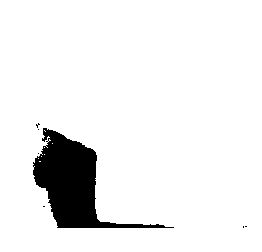

In [16]:
threshold_mask = thresholdMask(mask_data[:,:,0], threshold=0.52)
show_slice(threshold_mask)
plt.axis('off')
#IXI057-HH-1342-T1_side_mask_pred_75.nii

(-0.5, 255.5, -0.5, 255.5)

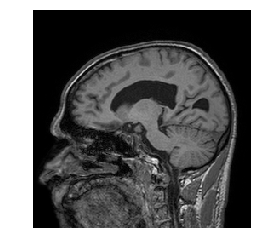

In [8]:
#norm_arr = [#norm_data2[127, :, :],
            #norm_data2[:, 127, :],
            #norm_data2[:, :, 74]]
norm = norm_data
show_slice(norm)
plt.axis('off')

0.63218844
6.6034076e-09
0.0


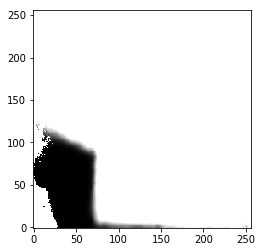

In [14]:
show_slice(mask_data[:,:,0])
print(np.max(mask_data))
print(np.min(mask_data))
print(len(np.where(mask_data == 1)[0])/np.prod(mask_data.shape))

(256, 256, 1)
0.4664484
1.0
0.99956745
1.0
20043


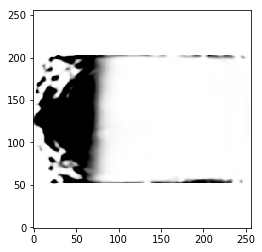

In [15]:
# Predicted
print(pmask_data.shape)
show_slice(pmask_data[:, :, 0])
print(np.min(pmask_data))
print(np.max(pmask_data))
print(np.median(pmask_data))
print(np.percentile(pmask_data, 75))
print(len(np.where(pmask_data == 1)[0]))

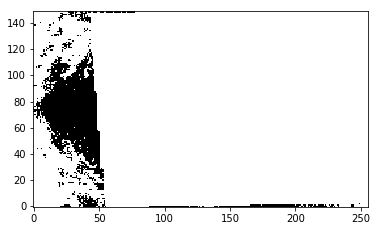

In [12]:
norm = norm_data
show_slice(norm)

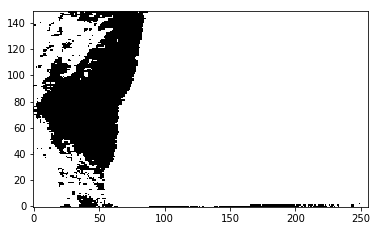

In [13]:
# Produce masked input via predicted mask
pred_applied_mask = np.multiply(pmask_data, norm)


show_slice(pred_applied_mask)

(-0.5, 255.5, -0.5, 255.5)

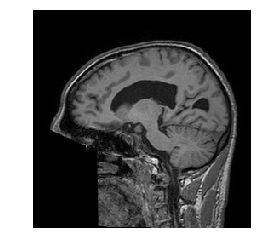

In [10]:
# Defaced
show_slice(def_data[:, :, 83])
plt.axis('off')